## Setup

In [65]:
#!pip install tensorflow-datasets

In [3]:

from sklearn.model_selection import train_test_split
import numpy as np
#import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import copy
from scipy.stats import entropy
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
# import tensorflow_datasets as tfds
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Clean Data

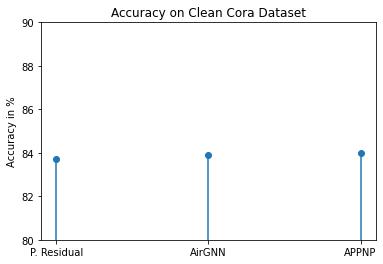

In [39]:
baseAccCora = [83.7, 83.9, 84.0] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean Cora Dataset");
plt.ylim(80.0, 90.0);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

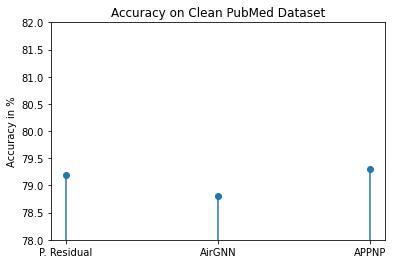

In [38]:
baseAccCora = [79.2, 78.8, 79.3] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean PubMed Dataset");
plt.ylim(78.0, 82.0);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

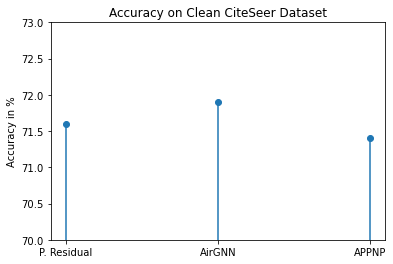

In [37]:
baseAccCora = [71.6, 71.9, 71.4] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean CiteSeer Dataset");
plt.ylim(70.0, 73);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

# Adversarial Plots

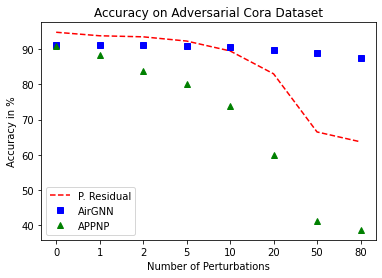

In [34]:
###Cora

pres = [94.8,93.8,93.5,92.3,89.5,83.0,66.5,63.7] 
airG = 100*np.array([0.913, 0.913, 0.913, 0.910, 0.907, 0.897, 0.890, 0.875])
app = 100*np.array([0.908, 0.882 , 0.837,0.802,0.738, 0.600, 0.412,0.387])
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
r = [0,1,2,3,4,5,6,7]
plt.plot(r, pres, 'r--');
plt.plot(r, airG, 'bs');
plt.plot(r, app, 'g^')
plt.legend(models)
#plt.ylim(70.0, 73);
plt.xticks(r,x);
plt.xlabel("Number of Perturbations")
plt.ylabel("Accuracy in %")
plt.title("Accuracy on Adversarial Cora Dataset");

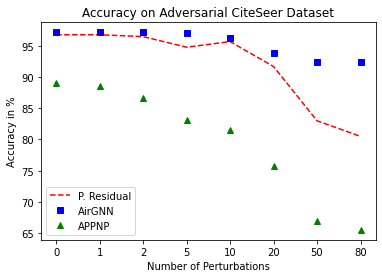

In [35]:
#cite seer

pres = [96.8,96.8,96.5,94.8,95.7,91.7,83.0,80.5] 
airG = 100*np.array([0.972,  0.972, 0.972, 0.970, 0.962 , 0.938 , 0.925, 0.925 ])
app = 100*np.array([0.890 ,0.885, 0.867 , 0.832, 0.815, 0.757, 0.670, 0.655])
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
r = [0,1,2,3,4,5,6,7]
plt.plot(r, pres, 'r--');
plt.plot(r, airG, 'bs');
plt.plot(r, app, 'g^')
plt.legend(models)
#plt.ylim(70.0, 73);
plt.xticks(r,x);
plt.xlabel("Number of Perturbations")
plt.ylabel("Accuracy in %")
plt.title("Accuracy on Adversarial CiteSeer Dataset");

ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

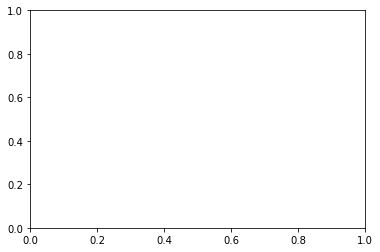

In [40]:
## pubmed

pres = [89.8, 67.5,82.3,62.7,56.7,56.7,56.7, 56.7] 
airG = 100*np.array([0.882, 0.830, 0.857, 0.823, 0.765, 0.760, 0.760, 0.760 ])
app = 100*np.array([0.895 , 0.680,0.635,0.530,0.515, 0.515,0.515, 0.515])

models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
r = [0,1,2,3,4,5,6,7]
plt.plot(r, pres, 'r--');
plt.plot(r, airG, 'bs');
plt.plot(r, app, 'g^')
plt.legend(models)
#plt.ylim(70.0, 73);
plt.xticks(r,x);
plt.xlabel("Number of Perturbations")
plt.ylabel("Accuracy in %")
plt.title("Accuracy on Adversarial PubMed Dataset");

In [ ]:
n = np.ones((4,5))
f = np.random.rand()